In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

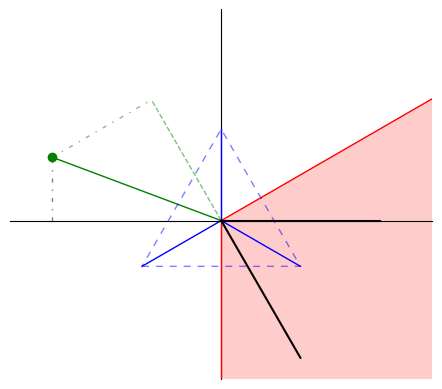

In [4]:
def point_go_to(origin, length, angle):
    return np.array([
        origin[0] + length * np.cos(angle),
        origin[1] + length * np.sin(angle)
    ])

# simplex
edge_length = .75
simplex = np.array([
    np.array([0., 0.]), 
    np.array([edge_length, 0.]),
    point_go_to(np.array([0., 0.]), edge_length, 60 * np.pi / 180),
    np.array([0., 0.])
])
## calculate height
height = edge_length / 2 * np.sqrt(3)
## position correction
simplex -= np.array([edge_length / 2, height / 3])
u1 = np.array([np.array([0., 0.]), simplex[0]])
u2 = np.array([np.array([0., 0.]), simplex[1]])
u3 = np.array([np.array([0., 0.]), simplex[2]])

# bisectors
bisector23 = np.array([
    np.array([0., 0.]), 
    point_go_to(np.array([0., 0.]), 5, 30 * np.pi / 180)
])
bisector12 = np.array([
    np.array([0., 0.]), 
    point_go_to(np.array([0., 0.]), 2, 270 * np.pi / 180)
])
bisector13 = np.array([
    np.array([0., 0.]), 
    point_go_to(np.array([0., 0.]), 2, 150 * np.pi / 180)
])

A = np.array([[0., 0.], [-.8, .3]])
# qA23 = np.dot(A[1], (u2 - u3)[1]) * (u2 - u3)
# qA23 /= np.linalg.norm(qA23)
qA21_N = np.array([[A[1, 0], 0], A[1]])

u2u3 = u2 - u3
angle_u2u3 = np.arctan(u2u3[1, 1] / u2u3[1, 0])
angle_A = np.arctan(A[1, 1] / A[1, 0])
qA23 = np.array([
    np.array([0, 0]),
    point_go_to(
        np.array([0, 0]), 
        np.linalg.norm(A[1]) * np.cos(angle_u2u3 - angle_A), 
        angle_u2u3 + np.pi
    )
])
qA23_N = np.array([A[1], qA23[1]])

# DRAWING

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axes.set_aspect('equal')
ax.plot(*simplex.T, color='blue', linewidth=1, linestyle=(0, (5, 5)), alpha=.5, zorder=999)
ax.plot(*u1.T, color='blue', linewidth=1)
ax.plot(*u2.T, color='blue', linewidth=1)
ax.plot(*u3.T, color='blue', linewidth=1, zorder=998)
ax.plot(*(u2 - u1).T, color='black', linewidth=1.5, zorder=999)
ax.plot(*(u2 - u3).T, color='black', linewidth=1.5, zorder=999)
ax.plot(*qA23.T, color='green', linewidth=1, linestyle='dashed', zorder=1, alpha=.5)
ax.plot(*qA23_N.T, color='green', linewidth=1, linestyle=(0, (3, 5, 1, 5)), zorder=1, alpha=.5)
ax.plot(*qA21_N.T, color='black', linewidth=1, linestyle=(0, (3, 5, 1, 5)), zorder=1, alpha=.5)
ax.plot(*bisector23.T, color='red', linewidth=1)
ax.fill_between(*bisector23.T, -20, linewidth=1, alpha=.2, facecolor='red')
ax.plot(*bisector12.T, color='red', linewidth=1, zorder=998)
#ax.plot(*bisector13.T, color='red', linewidth=1)
#ax.scatter([0], [0], color='black', s=[.5], zorder=998)
ax.plot(*A.T, color='green', linewidth=1, marker='o', markevery=[-1])

#ax.text(0, 0, '$s_1$')
#plt.axis('off')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern']
})
# making the top and right spine invisible:
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
# moving bottom spine up to y=0 position:
ax.xaxis.set_ticks_position('none')
ax.spines['bottom'].set_position(('data',0))
ax.set_xticks([])
plt.xlim((-1, 1))
# moving left spine to the right to position x == 0:
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_position(('data',0))
ax.set_yticks([])
plt.ylim((-.75, 1))

fig.savefig('output.pdf')

**TODO:**
- add axis/vector arrows
- add labels

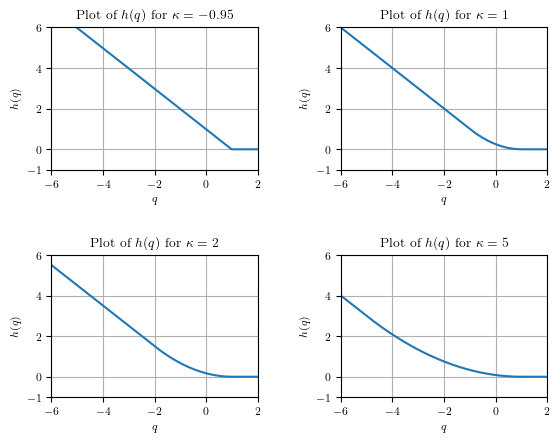

In [5]:
def h(q, kappa):
    if q <= -kappa:
        return 1 - q - (kappa + 1) / 2
    elif q > -kappa and q <= 1:
        return 1 / (2 * (kappa + 1)) * (1 - q)**2
    else:
        return 0

def plot_h(kappa, ax):
    q_values = np.linspace(-6, 4, 1000)
    h_values = [h(q, kappa) for q in q_values]

    ax.plot(q_values, h_values)
    ax.set(xlabel='$q$', ylabel='$h(q)$',
           xlim=(-6, 2), ylim=(-1, 6),
           xticks=[-6, -4, -2, 0, 2], yticks=[-1, 0, 2, 4, 6],
           title=f'Plot of $h(q)$ for $\kappa = {kappa}$'
    )
    ax.grid(True)

plt.rcParams.update({
    "font.size": 8
})

fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.6, wspace=0.4)
kappas = [[-.95, 1], [2, 5]]

for i in range(2):
    for j in range(2):
        plot_h(kappas[i][j], axs[i, j])

plt.savefig(f'plot_h.pdf')


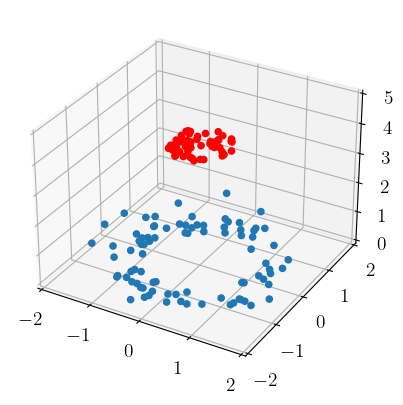

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.rcParams.update({
    "font.size": 14
})

mu, sigma, n_points = 0, .8, 200
xs = np.random.normal(mu, sigma, n_points)
ys = np.random.normal(mu, sigma, n_points)
ind1 = np.array([np.sqrt(xs[i]**2 + ys[i]**2) > 1 for i in range(n_points)])
ind2 = np.array([np.sqrt(xs[i]**2 + ys[i]**2) < .6 for i in range(n_points)])

ax.scatter(xs[ind1], ys[ind1], zs=np.zeros_like(xs[ind1]), alpha=1)
ax.scatter(xs[ind2], ys[ind2], zs=4 * np.ones_like(xs[ind2]), alpha=1, color='red')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 5)

ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_zticks([0, 1, 2, 3, 4 ,5])

plt.savefig(f'plot_3d.pdf')

plt.show()


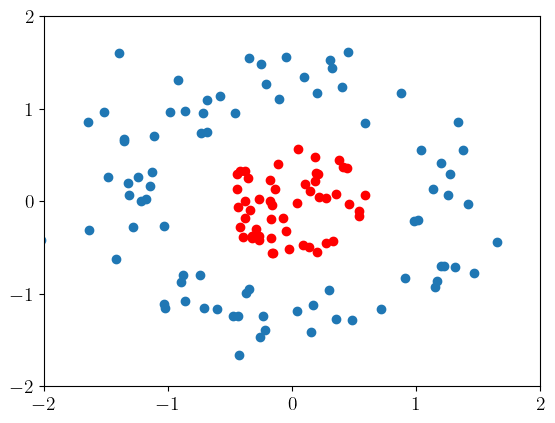

In [37]:
fig = plt.figure()

plt.scatter(xs[ind1], ys[ind1], alpha=1)
plt.scatter(xs[ind2], ys[ind2], alpha=1, color='red')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-2, -1, 0, 1, 2])

plt.savefig(f'plot_2d.pdf')

plt.show()